In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geohash

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 8)
%matplotlib inline

color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') 

In [59]:
df = pd.read_csv('./data/test.csv')
NYC_lon_range = [-74.15,-73.70]
NYC_lat_range = [40.60,41.00]

In [45]:
# df = df.sample(10000)
df.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


Text(0.5, 1.0, 'Dropoff Location (df)')

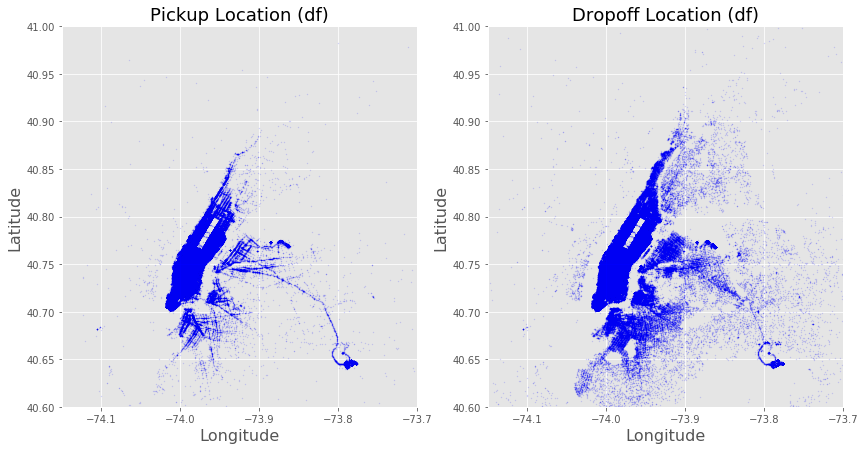

In [55]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.scatter(df.pickup_longitude,
            df.pickup_latitude,
            s=1,alpha=0.1,color='blue')

plt.ylim(NYC_lat_range)
plt.xlim(NYC_lon_range)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location (df)',fontsize=18)

ax1 = fig.add_subplot(122)

ax1.scatter(df.dropoff_longitude,
            df.dropoff_latitude,
            s=1,alpha=0.1,color='blue')

plt.ylim(NYC_lat_range)
plt.xlim(NYC_lon_range)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Dropoff Location (df)',fontsize=18)

## Create GeoHash

In [60]:
# Drop irrelevnat positions
df = df.drop(df[df['pickup_longitude'] < NYC_lon_range[0]].index)
df = df.drop(df[df['pickup_longitude'] > NYC_lon_range[1]].index)

df = df.drop(df[df['pickup_latitude'] < NYC_lat_range[0]].index)
df = df.drop(df[df['pickup_latitude'] > NYC_lat_range[1]].index)

df.count()

id                    624922
vendor_id             624922
pickup_datetime       624922
passenger_count       624922
pickup_longitude      624922
pickup_latitude       624922
dropoff_longitude     624922
dropoff_latitude      624922
store_and_fwd_flag    624922
dtype: int64

In [110]:
df['pickup_geohash'] = df.apply(lambda r: geohash.encode(r.pickup_longitude, r.pickup_latitude, precision=6), axis=1)

In [111]:
df.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_geohash
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,hfugnf
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,hfugjx
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,hfugp1
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,hfugrb
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,hfugpw


### Count the number of different clusters (geohas)

In [112]:
nb_clusters = df['pickup_geohash'].drop_duplicates().count()
nb_clusters

849

In [113]:
cluster_colors = [tuple(np.random.choice(range(256), size=3) / 255 ) for j in range(nb_clusters)] 
clusters = df['pickup_geohash'].drop_duplicates().values

Text(0.5, 1.0, 'Pickup Location (df)')

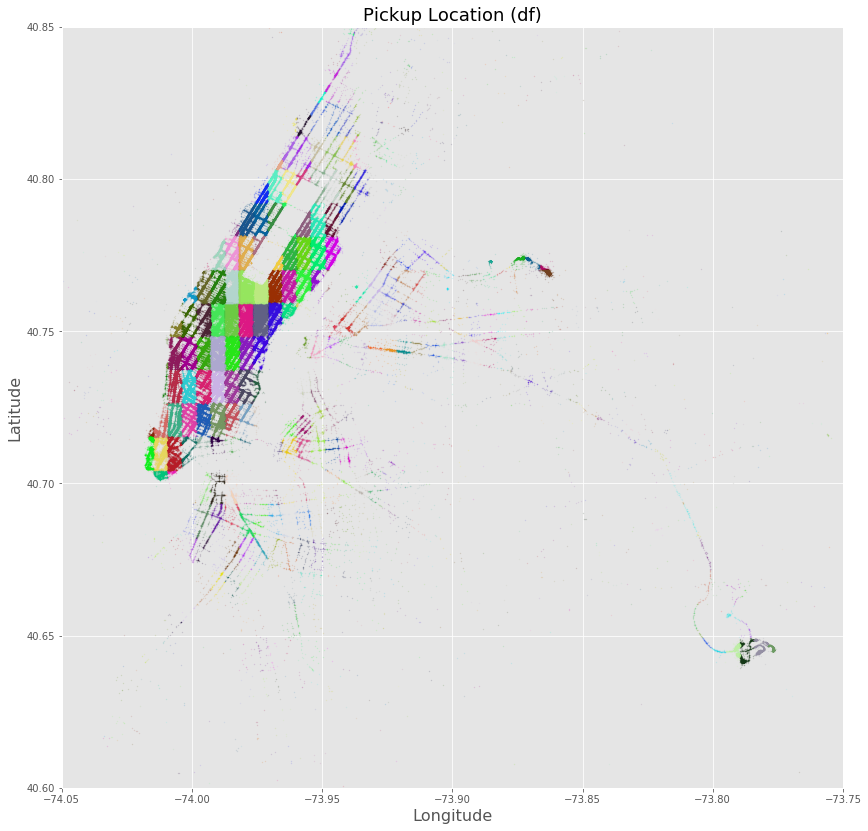

In [114]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(111)

count =0
for cluster in clusters:
    ax1.scatter(df.pickup_longitude[df.pickup_geohash == cluster],
            df.pickup_latitude[df.pickup_geohash == cluster],
            s=1,alpha=0.1,color=cluster_colors[count])
    count = count + 1

plt.ylim([40.6,40.85])
plt.xlim([-74.05, -73.75])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location (df)',fontsize=18)

In [123]:
cluster_count = df.groupby('pickup_geohash').count().sort_values('id', ascending=False).id

In [126]:
cluster_count_max = cluster_count.max()

## Most popular areas of NYC for pickups

cluster 1 > 27641 elements 27841
cluster 2 > 13820 elements 192992
cluster 3 > 9213 elements 172001
cluster 4 > 6910 elements 56653
cluster 5 > 5528 elements 54740
cluster 6 > 4606 elements 26122
cluster 7 > 3948 elements 12613
cluster 8 > 3455 elements 3587
cluster 9 > 3071 elements 13092


Text(0.5, 1.0, 'Pickup Location (df)')

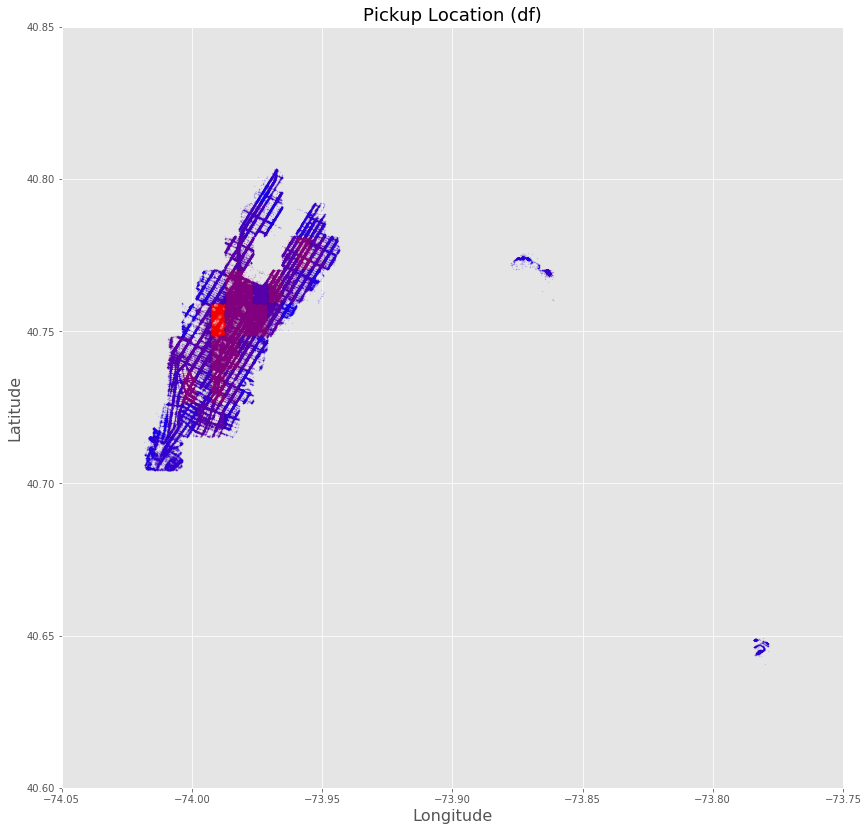

In [150]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(111)

last_threshold = cluster_count_max
for i in range(1, 10):
    threshold = (cluster_count_max -200)/ i
    df_to_plot = df[df['pickup_geohash'].isin(cluster_count[cluster_count >= threshold][cluster_count <= last_threshold].index)]
    last_threshold = threshold
    print('cluster %d > %d elements %d' % (i, threshold, df_to_plot.count().id))
    ax1.scatter(df_to_plot.pickup_longitude,
            df_to_plot.pickup_latitude,
            s=1,alpha=0.1,color=(1.0/float(i),0,1.0 - 1.0/float(i)))

plt.ylim([40.6,40.85])
plt.xlim([-74.05, -73.75])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location (df)',fontsize=18)